In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


## Import Libraries and Modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sklearn
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [7]:
train_df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')
#test_df = pd.read_csv('/kaggle/input/credit-score-classification/test.csv')
# test_df n credit score gui uchraas ashiglaj bolohgui n

/tmp/ipykernel_34/4215498176.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')


## Data Analysis

In [8]:
print(train_df.shape)

(100000, 28)


In [9]:
print(train_df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [10]:
# Dataniihaa yerunhii zohion baiguulalt, tulviig ajiglay
train_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [11]:
def convert_age_to_months(age):
    if isinstance(age, str):
        year_months = age.split(' Years and ')
        years = int(year_months[0]) if 'Years' in age else 0
        months = year_months[1].split(' Months')[0] if 'Months' in year_months[1] else '0'
        months = int(months)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  

In [12]:
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(convert_age_to_months)

In [13]:
train_df.duplicated().sum()

0

In [14]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
numeric_statistics = train_df[numeric_columns].describe()

print(numeric_statistics)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

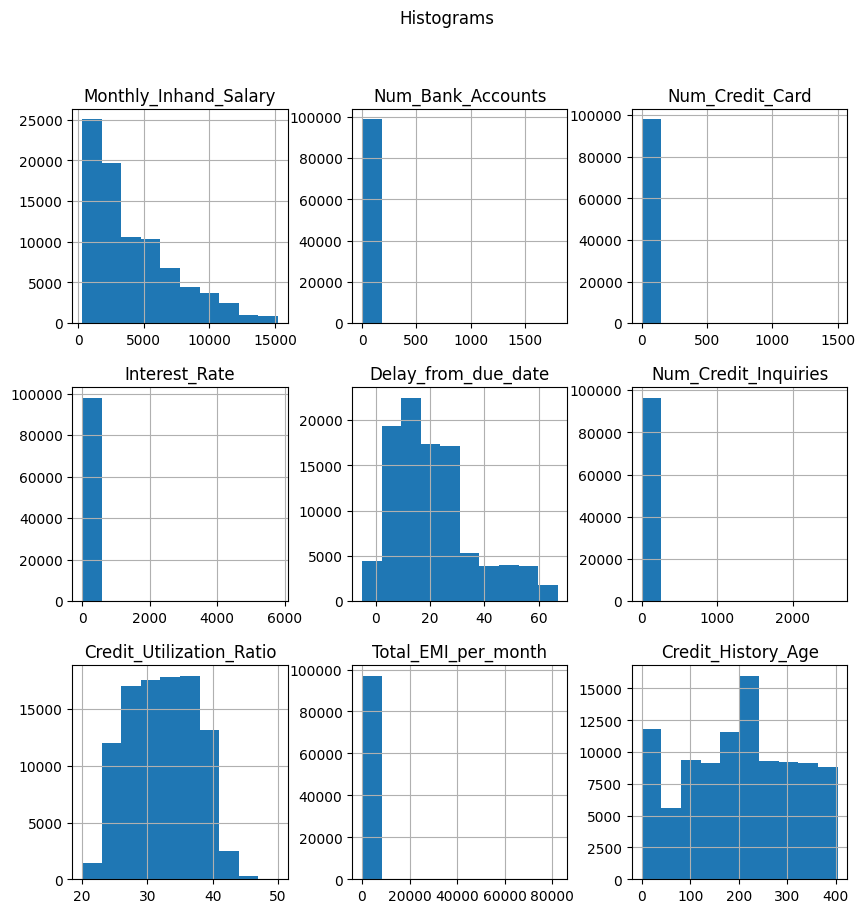

In [15]:
train_df[numeric_columns].hist(bins=10, figsize=(10, 10))
plt.suptitle('Histograms')
plt.show()

In [16]:
loan_counts = train_df['Type_of_Loan'].nunique()
print(loan_counts)

6260


In [17]:
aaron_delayed_payments = train_df.loc[train_df['Customer_ID'] == 'CUS_0xd40', 'Num_of_Delayed_Payment']

print(aaron_delayed_payments)

0      7
1    NaN
2      7
3      4
4    NaN
5      4
6     8_
7      6
Name: Num_of_Delayed_Payment, dtype: object


In [18]:
aaron_delayed_payments = train_df.loc[train_df['Customer_ID'] == 'CUS_0xd40', 'Credit_History_Age']

print(aaron_delayed_payments)

0    265
1      0
2    267
3    268
4    269
5    270
6    271
7      0
Name: Credit_History_Age, dtype: int64


Customer ID aar n NaN utguudiig nuhuj bolno (oiroltsoo utga)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Clean age column

In [20]:
train_df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [21]:
def clean_age(age):
    age = age.replace('_', '')
    age_int = int(age)
    
    if age_int < 0:
        age_int = abs(age_int)
    
    return age_int

In [22]:
train_df['Age'] = train_df['Age'].apply(clean_age)

In [23]:
aaron_age = train_df.loc[train_df['Customer_ID'] == 'CUS_0xd40', 'Age']

print(aaron_age)

0     23
1     23
2    500
3     23
4     23
5     23
6     23
7     23
Name: Age, dtype: int64


In [24]:
def replace_outliers_with_mode(df):
    def replace_outliers(group):
        mode_age = group.mode()[0]
        group = group.apply(lambda x: mode_age if abs(x - mode_age) > 3 else x)
        return group
    
    df['Age'] = df.groupby('Customer_ID')['Age'].transform(replace_outliers)
    return df

Customer iin nasiig n zasahdaa busad nasnii mode oos 3aas ih zoruutei bol mode oor n nasiig n soliy.

In [25]:
train_df = replace_outliers_with_mode(train_df)

In [26]:
print(train_df.loc[train_df['Customer_ID'] == 'CUS_0xd40', 'Age'])

0    23
1    23
2    23
3    23
4    23
5    23
6    23
7    23
Name: Age, dtype: int64


In [32]:
train_df['Age'].unique()

# nas n odoo jigd bolloo

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52])

In [33]:
train_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,265,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,0,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,267,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,268,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,270,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,271,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,0,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,319,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [34]:
train_df = train_df.sort_values(by='Customer_ID')

In [35]:
train_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56759,0x16291,CUS_0x1000,August,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,30.077191,129,Yes,42.941090,77.31427572208112,High_spent_Medium_value_payments,400.36080052211616,Poor
56754,0x1628c,CUS_0x1000,March,Alistair Barrf,17,913-74-1218,Lawyer,30625.94_,2706.161667,6,...,Bad,1562.91,38.285928,124,Yes,42.941090,109.05651876486915,High_spent_Medium_value_payments,368.61855747932816,Poor
56755,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,125,Yes,42.941090,87.90990881495769,!@9#%8,419.7651674292397,Poor
56756,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,126,Yes,42.941090,191.8347674990596,Low_spent_Large_value_payments,305.8403087451377,Poor
56757,0x1628f,CUS_0x1000,June,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,40.082272,127,Yes,42.941090,114.80240059146288,High_spent_Small_value_payments,372.87267565273436,Poor
56758,0x16290,CUS_0x1000,July,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,38.149539,128,Yes,42.941090,266.59716045509043,Low_spent_Small_value_payments,251.0779157891069,Poor
56753,0x1628b,CUS_0x1000,February,NaN,17,913-74-1218,Lawyer,30625.94,NaN,6,...,Bad,1562.91,29.439759,123,Yes,42.941090,176.13256665597928,High_spent_Small_value_payments,311.542509588218,Poor
56752,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,122,Yes,42.941090,244.75028300769162,Low_spent_Large_value_payments,252.9247932365056,Standard
13766,0x66a8,CUS_0x1009,July,Arunah,26,063-67-6938,Mechanic,52312.68,4250.390000,6,...,Standard,202.68,33.943118,371,Yes,108.366467,155.14105344210978,High_spent_Medium_value_payments,411.5314794326347,Standard
13765,0x66a7,CUS_0x1009,June,Arunah,26,063-67-6938,_______,52312.68,4250.390000,6,...,Standard,202.68,30.608990,370,Yes,108.366467,150.79593432594388,!@9#%8,445.87659854880053,Standard


In [36]:
for i in range(1, len(train_df)):
    if pd.isna(train_df.at[i, 'Monthly_Inhand_Salary']) and \
       train_df.at[i, 'Annual_Income'] == train_df.at[i-1, 'Annual_Income']:
        train_df.at[i, 'Monthly_Inhand_Salary'] = train_df.at[i-1, 'Monthly_Inhand_Salary']

In [37]:
print(train_df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary        4203
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [38]:
print(train_df['Num_of_Delayed_Payment'])

56759    26
56754    28
56755    25
56756    25
56757    23
         ..
99158    12
99159    11
99153    12
99152     9
99154    12
Name: Num_of_Delayed_Payment, Length: 100000, dtype: object


### num of delayed payment fix

In [39]:
def clean_delayed_payment(payment):
    if isinstance(payment, str):
        payment = payment.replace('_', '')
        payment_int = int(payment)
        if payment_int < 0:
            payment_int = abs(payment_int)
        return payment_int
    else:
        return payment

In [40]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(clean_delayed_payment)

In [41]:
train_df['Num_of_Delayed_Payment'].nunique()

708

In [42]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
numeric_statistics = train_df[numeric_columns].describe()

print(numeric_statistics)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           95797.000000      100000.000000     100000.00000   
mean             4193.809417          17.091280         22.47443   
std              3183.175333         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.265833           3.000000          4.00000   
50%              3091.000000           6.000000          5.00000   
75%              5956.010000           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Num_of_Delayed_Payment  Delay_from_due_date  \
count  100000.000000            92998.000000        100000.000000   
mean       72.466040               30.946268            21.068780   
std       466.422621              226.028754            14.860104   
min         1.000000                0.000000            -5.000000   
25%         8.000000                9.0000

Annual_Income, Num_of_Loan,Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance missing

In [43]:
train_df[['Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']].tail(10)

,Annual_Income,Num_of_Loan,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
12957,60877.17,8,8.82,1300.13,__10000__,279.82092140488413
12959,60877.17,8,8.82,1300.13,46.4256138380274,442.5749666782518
99155,41398.44,-100,10.07,1701.88,234.3549398533252,247.655411
99156,41398.44,6_,10.07,1701.88,104.6294735081563,337.380877
99157,41398.44,6,10.07,1701.88,47.007378731604064,395.002972
99158,41398.44_,6,10.07,1701.88,257.98969352901736,194.020657
99159,41398.44,6,12.07,1701.88,42.57571978536272,389.434631
99153,41398.44,6,10.07,1701.88,132.3633479629823,349.647003
99152,41398.44,6,10.07,1701.88,195.52927326749446,266.481077
99154,41398.44,6,10.07,1701.88,336.13023109571515,145.880119


In [44]:
def clean_columns_int(amount):
    if isinstance(amount, str):
        amount = amount.replace('_', '')
        amount_int = int(amount)
    
    #if payment_int < 0:
    #    payment_int = abs(age_int)
    
        return amount_int
    else:
        return amount
    
def clean_columns_float(amount):
    if isinstance(amount, str):
        amount = amount.replace('_', '')
        if amount == '':
            # None butsaatal 99409 None bolson
            return 0.0
        amount_float = float(amount)
        return amount_float
    else:
        return amount

In [45]:
columns_to_int = ['Num_of_Loan']
columns_to_float = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

In [46]:
train_df[columns_to_int] = train_df[columns_to_int].apply(lambda col: col.apply(clean_columns_int))

In [47]:
train_df[columns_to_float] = train_df[columns_to_float].apply(lambda col: col.apply(clean_columns_float))

In [48]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
numeric_statistics = train_df[numeric_columns].describe()

print(numeric_statistics)

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   1.000000e+05           95797.000000      100000.000000   
mean    1.764157e+05            4193.809417          17.091280   
std     1.429618e+06            3183.175333         117.404834   
min     7.005930e+03             303.645417          -1.000000   
25%     1.945750e+04            1625.265833           3.000000   
50%     3.757861e+04            3091.000000           6.000000   
75%     7.279092e+04            5956.010000           7.000000   
max     2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Num_of_Delayed_Payment  \
count     100000.00000  100000.000000  100000.000000            92998.000000   
mean          22.47443      72.466040       3.009960               30.946268   
std          129.05741     466.422621      62.647879              226.028754   
min            0.00000       1.000000    -100.000000                0.000000   
25%  

In [49]:
def negative_to_abs(amount):
    if isinstance(amount, int):
        if amount < 0:
            return abs(amount)
        else:
            return amount
    else:
        return amount

In [50]:
train_df['Delay_from_due_date'] = train_df['Delay_from_due_date'].apply(negative_to_abs)

In [51]:
print(train_df['Delay_from_due_date'])

56759    57
56754    62
56755    64
56756    67
56757    62
         ..
99158    23
99159    23
99153    23
99152    25
99154    25
Name: Delay_from_due_date, Length: 100000, dtype: int64


In [52]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
numeric_statistics = train_df[numeric_columns].describe()

print(numeric_statistics)

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   1.000000e+05           95797.000000      100000.000000   
mean    1.764157e+05            4193.809417          17.091280   
std     1.429618e+06            3183.175333         117.404834   
min     7.005930e+03             303.645417          -1.000000   
25%     1.945750e+04            1625.265833           3.000000   
50%     3.757861e+04            3091.000000           6.000000   
75%     7.279092e+04            5956.010000           7.000000   
max     2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Num_of_Delayed_Payment  \
count     100000.00000  100000.000000  100000.000000            92998.000000   
mean          22.47443      72.466040       3.009960               30.946268   
std          129.05741     466.422621      62.647879              226.028754   
min            0.00000       1.000000    -100.000000                0.000000   
25%  

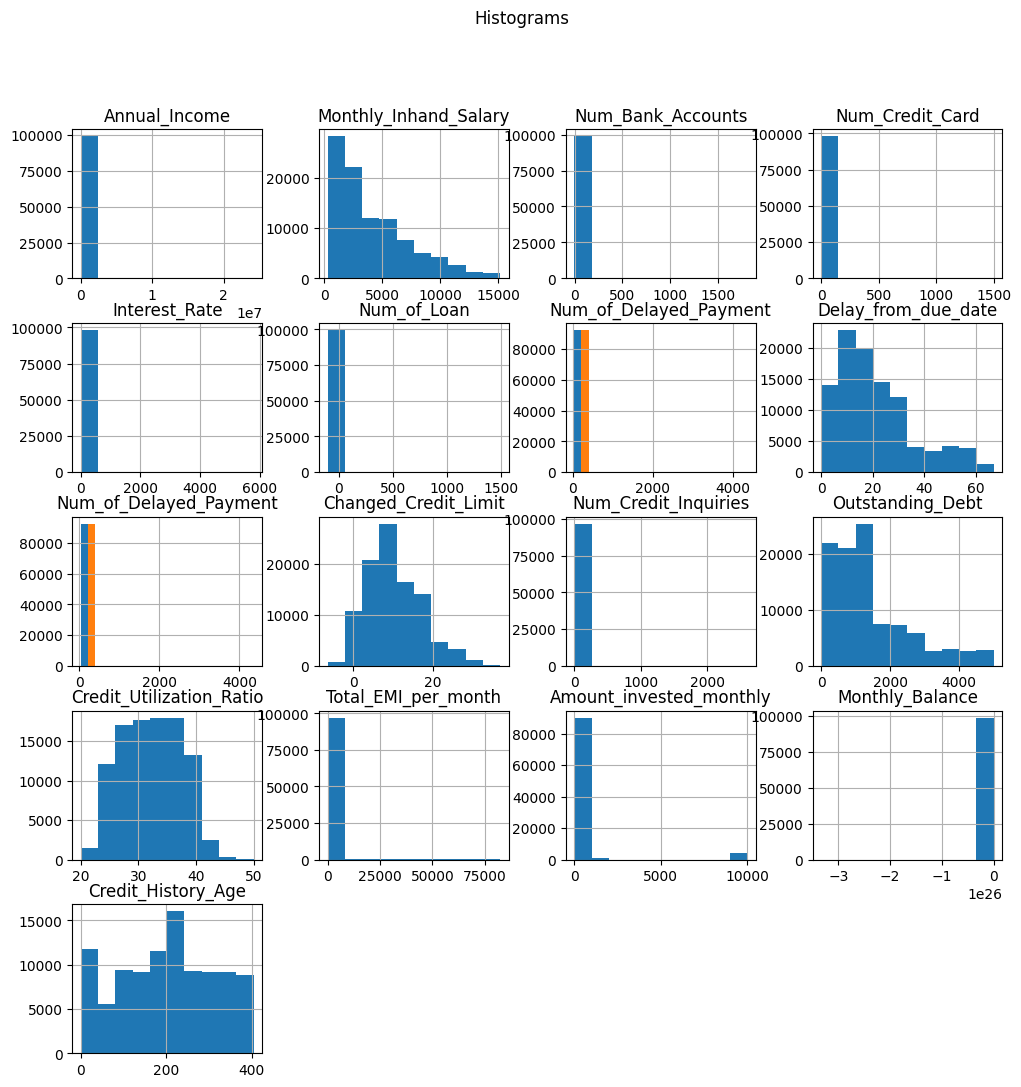

In [53]:
train_df[numeric_columns].hist(bins=10, figsize=(12, 12))
plt.suptitle('Histograms')
plt.show()

In [54]:
print(train_df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary        4203
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [55]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 56759 to 99154
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     95797 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   obj

In [56]:
print(train_df.loc[train_df['Customer_ID'] == 'CUS_0xd40', 'Num_of_Delayed_Payment'])

2    7.0
4    NaN
3    4.0
5    4.0
6    8.0
7    6.0
1    NaN
0    7.0
Name: Num_of_Delayed_Payment, dtype: float64


In [57]:
def replace_outliers_with_avg(df):
    def replace_outliers(group):
        avg_delayed_payment = group.mean()
        
        def replace_value(x):
            if pd.isna(x):
                return avg_delayed_payment
            else:
                return x
        
        return group.apply(replace_value)
    
    df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(replace_outliers)
    return df

In [58]:
train_df = replace_outliers_with_avg(train_df)

In [59]:
print(train_df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary        4203
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [60]:
def replace_outliers_with_mode_history(df):
    def replace_outliers(group):
        non_zero_group = group[group != 0]
        if len(non_zero_group) > 0:
            mode_age = non_zero_group.mode()[0]
        else:
            mode_age = group.mean()

        def replace_value(x):
            if abs(x - mode_age) > 5:
                return mode_age
            else:
                return x
        
        return group.apply(replace_value)
    
    df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(replace_outliers)
    return df

In [61]:
train_df = replace_outliers_with_mode_history(train_df)

In [62]:
# Drop hiih columns

# Type of loan, Name, 

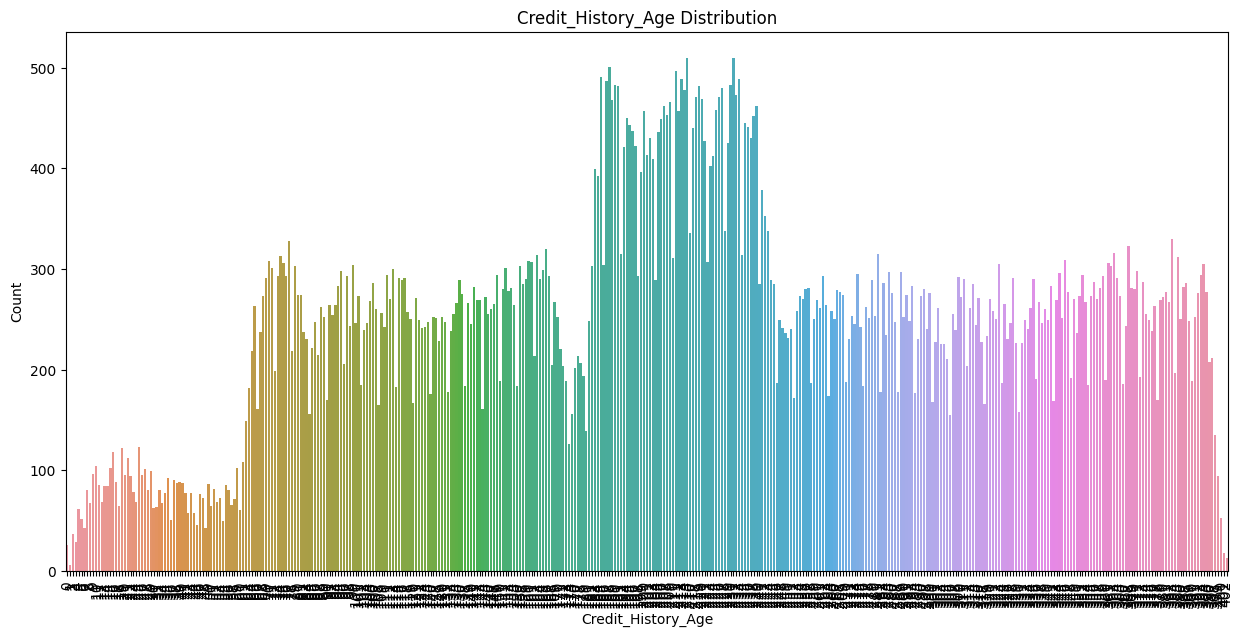

In [64]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Credit_History_Age', data=train_df)
plt.title('Credit_History_Age Distribution')
plt.xlabel('Credit_History_Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

<Axes: xlabel='Credit_History_Age'>

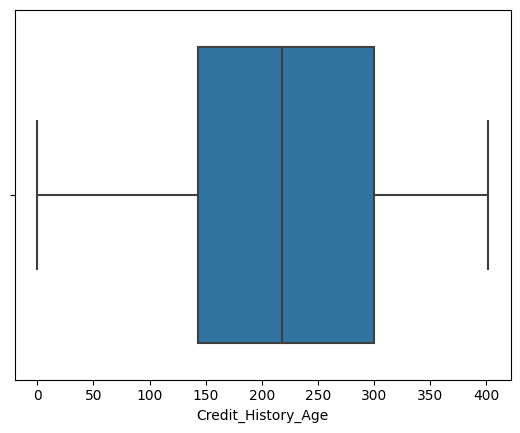

In [65]:
sns.boxplot(x = 'Credit_History_Age', data = train_df)

Age, Delay_from_due_date - no outliers, 

Outstanding_Debt, Credit_History_Age --> gaigui

Num_bank_accounts --> 100s deesh bolomjgui
Num_Credit_Card --> 100s deesh bh bolomjgui
Interest_Rate --> 100s deesh bh bolomjgui
Num_of_Delayed_Payment --> 100s deesh bh bolomjgui
Credit_Utilization_Ratio --> 100s deesh bh bolomjgui


Num_of_Loan --> 0s ih 1000s baga
 --> 



In [66]:
columns_to_check = [
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Num_of_Delayed_Payment', 
    'Credit_Utilization_Ratio'
]

In [67]:
condition = (train_df[columns_to_check] <= 100).all(axis=1)
reduced_df = train_df[condition]

In [68]:
reduced_df = reduced_df[reduced_df['Num_of_Loan'].between(0, 500)]

In [69]:
reduced_df.shape

(89804, 28)

In [70]:
print(reduced_df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary        3763
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10269
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1751
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4026
Payment_Behaviour               0
Monthly_Balance              1088
Credit_Score                    0
dtype: int64


In [71]:
reduced_df = reduced_df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan'], axis=1)

In [72]:
reduced_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56759,18,Lawyer,30625.94,2706.161667,6,5,27,2,57,26.0,...,Bad,1562.91,30.077191,122,Yes,42.94109,77.314276,High_spent_Medium_value_payments,400.360801,Poor
56754,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,28.0,...,Bad,1562.91,38.285928,124,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,Poor
56755,17,Lawyer,30625.94,2706.161667,6,5,27,2,64,25.0,...,Bad,1562.91,32.843081,125,Yes,42.94109,87.909909,!@9#%8,419.765167,Poor
56756,17,Lawyer,30625.94,2706.161667,6,5,27,2,67,25.0,...,Bad,1562.91,32.330508,126,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor
56757,18,Lawyer,30625.94,2706.161667,6,5,27,2,62,23.0,...,Bad,1562.91,40.082272,127,Yes,42.94109,114.802401,High_spent_Small_value_payments,372.872676,Poor


In [73]:
reduced_df['Occupation'].unique()

array(['Lawyer', 'Mechanic', '_______', 'Media_Manager', 'Doctor',
       'Journalist', 'Accountant', 'Manager', 'Entrepreneur', 'Scientist',
       'Architect', 'Teacher', 'Engineer', 'Writer', 'Developer',
       'Musician'], dtype=object)

In [74]:
reduced_df['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [75]:
print(reduced_df.isnull().sum())

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3763
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1751
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4026
Payment_Behaviour              0
Monthly_Balance             1088
Credit_Score                   0
dtype: int64


In [76]:
filtered_df = reduced_df.dropna()

In [77]:
filtered_df.shape

(79615, 22)

In [78]:
credit_score_counts = filtered_df['Credit_Score'].value_counts()
print(credit_score_counts)

Credit_Score
Standard    42416
Poor        23144
Good        14055
Name: count, dtype: int64


In [79]:
label_encoder = LabelEncoder()

In [80]:
filtered_df['Occupation'] = label_encoder.fit_transform(filtered_df['Occupation'])
print('Occupation:')
print(list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df['Credit_Mix'] = label_encoder.fit_transform(filtered_df['Credit_Mix'])
print('Credit_Mix:')
print(list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df['Payment_of_Min_Amount'] = label_encoder.fit_transform(filtered_df['Payment_of_Min_Amount'])
print('Payment_of_Min_Amount:')
print(list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df['Payment_Behaviour'] = label_encoder.fit_transform(filtered_df['Payment_Behaviour'])
print('Payment_Behaviour:')
print(list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df['Credit_Score'] = label_encoder.fit_transform(filtered_df['Credit_Score'])
print('Credit_Score:')
print(list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Occupation:
[('Accountant', 0), ('Architect', 1), ('Developer', 2), ('Doctor', 3), ('Engineer', 4), ('Entrepreneur', 5), ('Journalist', 6), ('Lawyer', 7), ('Manager', 8), ('Mechanic', 9), ('Media_Manager', 10), ('Musician', 11), ('Scientist', 12), ('Teacher', 13), ('Writer', 14), ('_______', 15)]
Credit_Mix:
[('Bad', 0), ('Good', 1), ('Standard', 2), ('_', 3)]
Payment_of_Min_Amount:
[('NM', 0), ('No', 1), ('Yes', 2)]
Payment_Behaviour:
[('!@9#%8', 0), ('High_spent_Large_value_payments', 1), ('High_spent_Medium_value_payments', 2), ('High_spent_Small_value_payments', 3), ('Low_spent_Large_value_payments', 4), ('Low_spent_Medium_value_payments', 5), ('Low_spent_Small_value_payments', 6)]
Credit_Score:
[('Good', 0), ('Poor', 1), ('Standard', 2)]


/tmp/ipykernel_34/1738646673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Occupation'] = label_encoder.fit_transform(filtered_df['Occupation'])
/tmp/ipykernel_34/1738646673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Credit_Mix'] = label_encoder.fit_transform(filtered_df['Credit_Mix'])
/tmp/ipykernel_34/1738646673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [81]:
filtered_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56759,18,7,30625.94,2706.161667,6,5,27,2,57,26.0,...,0,1562.91,30.077191,122,2,42.94109,77.314276,2,400.360801,1
56754,17,7,30625.94,2706.161667,6,5,27,2,62,28.0,...,0,1562.91,38.285928,124,2,42.94109,109.056519,2,368.618557,1
56755,17,7,30625.94,2706.161667,6,5,27,2,64,25.0,...,0,1562.91,32.843081,125,2,42.94109,87.909909,0,419.765167,1
56756,17,7,30625.94,2706.161667,6,5,27,2,67,25.0,...,0,1562.91,32.330508,126,2,42.94109,191.834767,4,305.840309,1
56757,18,7,30625.94,2706.161667,6,5,27,2,62,23.0,...,0,1562.91,40.082272,127,2,42.94109,114.802401,3,372.872676,1


In [150]:
column_names_list = filtered_df.columns.tolist()

In [151]:
column_names_list

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [82]:
filtered_df = filtered_df.sample(frac=1)

In [83]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

In [84]:
X = filtered_df.drop(['Credit_Score'], axis=1)
y = filtered_df['Credit_Score']

In [85]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [86]:
ros = RandomOverSampler(sampling_strategy={1: 42416, 0 : 42416}, random_state=42)

# Apply RandomOverSampler to the DataFrame
X = filtered_df.drop(columns='Credit_Score')
y = filtered_df['Credit_Score']

X_resampled, y_resampled = ros.fit_resample(X, y)

In [87]:
X_resampled

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,19,6,72245.76,6123.480000,9,10,19,5,54,24.0,...,9.0,0,4329.12,26.971267,31,2,857.357722,10000.000000,1,524.044075
1,38,14,10361.92,666.493333,6,5,32,7,55,21.0,...,6.0,0,3293.10,37.443121,26,2,44.012126,64.196707,6,248.440501
2,40,5,81831.72,6910.310000,5,4,1,4,12,4.0,...,2.0,1,446.42,25.684129,214,1,234.509396,109.968993,1,586.552611
3,52,6,170824.68,14489.390000,0,3,4,4,6,4.0,...,7.0,3,1167.04,41.236723,302,1,566.134770,202.455585,2,930.348645
4,48,9,129982.41,10653.867500,3,2,12,4,6,4.0,...,8.0,1,395.78,31.222197,343,1,278.042166,244.887510,0,782.457074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127243,44,11,31980.14,2924.011667,7,3,16,6,21,18.0,...,10.0,2,1902.33,35.567091,89,2,142.796965,113.683125,4,305.921077
127244,17,12,17910.36,1521.530000,5,7,15,6,23,8.0,...,9.0,2,2577.05,23.315980,118,2,59.674447,29.426146,1,303.052406
127245,14,0,14428.91,1029.409167,6,8,28,5,52,22.0,...,12.0,0,1726.92,24.548210,203,2,39.761412,77.578385,6,275.601119
127246,35,9,20849.21,1503.434167,8,5,33,6,46,16.0,...,10.0,0,1694.32,22.394399,136,2,53.209015,127.548951,5,249.585451


In [149]:
X_resampled.iloc[1]

Age                            38.000000
Occupation                     14.000000
Annual_Income               10361.920000
Monthly_Inhand_Salary         666.493333
Num_Bank_Accounts               6.000000
Num_Credit_Card                 5.000000
Interest_Rate                  32.000000
Num_of_Loan                     7.000000
Delay_from_due_date            55.000000
Num_of_Delayed_Payment         21.000000
Changed_Credit_Limit           26.920000
Num_Credit_Inquiries            6.000000
Credit_Mix                      0.000000
Outstanding_Debt             3293.100000
Credit_Utilization_Ratio       37.443121
Credit_History_Age             26.000000
Payment_of_Min_Amount           2.000000
Total_EMI_per_month            44.012126
Amount_invested_monthly        64.196707
Payment_Behaviour               6.000000
Monthly_Balance               248.440501
Name: 1, dtype: float64

In [88]:
norm = Normalizer().fit(X_resampled)
X = norm.transform(X_resampled)
X = np.asarray(X)
Y = np.asarray(y_resampled)

In [89]:
print(X.shape, Y.shape)

(127248, 21) (127248,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [91]:
import torch
import torch.nn.functional as F

In [92]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [93]:
print(X_train[0])

[2.68962252e-04 9.71252577e-05 9.96484299e-01 8.30403583e-02
 0.00000000e+00 3.73558683e-05 3.73558683e-05 1.49423473e-05
 7.47117367e-06 3.73558683e-05 6.09647771e-05 2.24135210e-05
 7.47117367e-06 8.45512724e-03 3.08986532e-04 1.98733220e-03
 7.47117367e-06 1.28465743e-03 3.04632088e-03 3.73558683e-05
 6.06498614e-03]


In [142]:
print(y_train_tensor)

tensor([1, 1, 1,  ..., 1, 1, 2])


In [123]:
input_size = X_train_tensor.shape[1]
hidden_size = 64
learning_rate = 0.02
num_epochs = 600

In [133]:
input_size

21

In [124]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 128)
        self.bn1 = torch.nn.BatchNorm1d(128)
        self.relu1 = torch.nn.ReLU()
        self.dropout1 = torch.nn.Dropout(dropout_rate)
        
        self.fc2 = torch.nn.Linear(128, 64)
        self.bn2 = torch.nn.BatchNorm1d(64)
        self.relu2 = torch.nn.ReLU()
        self.dropout2 = torch.nn.Dropout(dropout_rate)
        
        self.fc3 = torch.nn.Linear(64, 32)
        self.bn3 = torch.nn.BatchNorm1d(32)
        self.relu3 = torch.nn.ReLU()
        self.dropout3 = torch.nn.Dropout(dropout_rate)
        
        self.fc4 = torch.nn.Linear(32, 16)
        self.bn4 = torch.nn.BatchNorm1d(16)
        self.relu4 = torch.nn.ReLU()
        self.dropout4 = torch.nn.Dropout(dropout_rate)
        
        self.fc5 = torch.nn.Linear(16, 8)
        self.bn5 = torch.nn.BatchNorm1d(8)
        self.relu5 = torch.nn.ReLU()
        self.dropout5 = torch.nn.Dropout(dropout_rate)
        
        self.fc6 = torch.nn.Linear(8, 3)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.dropout3(out)
        
        out = self.fc4(out)
        out = self.bn4(out)
        out = self.relu4(out)
        out = self.dropout4(out)
        
        out = self.fc5(out)
        out = self.bn5(out)
        out = self.relu5(out)
        out = self.dropout5(out)
        
        out = self.fc6(out)
        out = self.sigmoid(out)
        
        return out

In [125]:
model = NeuralNetwork(input_size, hidden_size)
loss_fn = torch.nn.CrossEntropyLoss()
model

NeuralNetwork(
  (fc1): Linear(in_features=21, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (bn4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (dropout4): Dropout(p=0.3, inplace=False)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (bn5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [126]:
import torch.optim as optim

In [127]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.02
    maximize: False
    weight_decay: 0
)

In [128]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.8)

In [129]:
y_train_tensor = y_train_tensor.long()

In [130]:
for i in range(num_epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Calculate loss
    loss = F.cross_entropy(y_pred, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    scheduler.step()
    
    if (i+1) % 10 == 0:
        with torch.no_grad():
            _, train_predictions = torch.max(y_pred, 1)
            train_accuracy = (train_predictions == y_train_tensor).float().mean().item()
        
        print(f'Epoch [{i+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}')

Epoch [10/600], Loss: 1.0128, Train Accuracy: 0.5331
Epoch [20/600], Loss: 0.9612, Train Accuracy: 0.5593
Epoch [30/600], Loss: 0.9460, Train Accuracy: 0.5667
Epoch [40/600], Loss: 0.9403, Train Accuracy: 0.5686
Epoch [50/600], Loss: 0.9384, Train Accuracy: 0.5695
Epoch [60/600], Loss: 0.9356, Train Accuracy: 0.5706
Epoch [70/600], Loss: 0.9333, Train Accuracy: 0.5709
Epoch [80/600], Loss: 0.9335, Train Accuracy: 0.5697
Epoch [90/600], Loss: 0.9322, Train Accuracy: 0.5690
Epoch [100/600], Loss: 0.9323, Train Accuracy: 0.5700
Epoch [110/600], Loss: 0.9298, Train Accuracy: 0.5710
Epoch [120/600], Loss: 0.9285, Train Accuracy: 0.5725
Epoch [130/600], Loss: 0.9269, Train Accuracy: 0.5763
Epoch [140/600], Loss: 0.9263, Train Accuracy: 0.5792
Epoch [150/600], Loss: 0.9239, Train Accuracy: 0.5887
Epoch [160/600], Loss: 0.9133, Train Accuracy: 0.6221
Epoch [170/600], Loss: 0.9066, Train Accuracy: 0.6312
Epoch [180/600], Loss: 0.8996, Train Accuracy: 0.6409
Epoch [190/600], Loss: 0.8920, Train 

In [131]:
y_test_tensor = y_test_tensor.long()

In [139]:
print(X_test_tensor[0])

tensor([3.7285e-03, 1.2027e-04, 9.2655e-01, 7.8415e-02, 7.2165e-04, 9.6220e-04,
        2.1649e-03, 7.2165e-04, 6.4948e-03, 2.2852e-03, 1.9304e-03, 1.8041e-03,
        0.0000e+00, 3.6623e-01, 3.2115e-03, 3.0069e-03, 2.4055e-04, 3.8585e-03,
        5.9049e-03, 7.2165e-04, 3.2958e-02])


In [145]:
print(X_test[0])

[3.72851005e-03 1.20274518e-04 9.26550983e-01 7.84153271e-02
 7.21647106e-04 9.62196141e-04 2.16494132e-03 7.21647106e-04
 6.49482395e-03 2.28521583e-03 1.93040601e-03 1.80411776e-03
 0.00000000e+00 3.66228690e-01 3.21152830e-03 3.00686294e-03
 2.40549035e-04 3.85853862e-03 5.90487314e-03 7.21647106e-04
 3.29577311e-02]


In [143]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test_tensor.cpu().numpy()
y_pred = model(X_test_tensor).max(1)[1].cpu().numpy()

print(y_true)
print(y_pred)

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_true, y_pred, output_dict=True)
print('Classification Report:')
print(f'Precision: {report["macro avg"]["precision"]:.4f}')
print(f'Recall: {report["macro avg"]["recall"]:.4f}')
print(f'F1-Score: {report["macro avg"]["f1-score"]:.4f}')
print(f'Support: {report["macro avg"]["support"]}')

[1 2 2 ... 0 0 2]
[1 2 0 ... 0 2 0]
Confusion Matrix:
[[6921  172 1390]
 [1440 5904 1139]
 [2577 1706 4201]]
Classification Report:
Precision: 0.6719
Recall: 0.6690
F1-Score: 0.6637
Support: 25450


In [134]:
file_path = "model.pth"

torch.save(model.state_dict(), file_path)